In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import os
import sys
import git
import pathlib

PROJ_ROOT_PATH = pathlib.Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
PROJ_ROOT =  str(PROJ_ROOT_PATH)
if PROJ_ROOT not in sys.path:
    sys.path.append(PROJ_ROOT)
    
from libs.constants import model_seeds, error_seeds

In [4]:
model_seeds = model_seeds[0:3]
error_seeds = [error_seeds[0], error_seeds[2]]

In [5]:
results_filename = 'evaluate_ga_optim-mnist32-cnn--qmean-c0--LIM_05-ERR_-1.npy'
results = np.load(str(results_filename), allow_pickle='TRUE').item()

In [6]:
error_profile_list = ["LIM_05-2188","LIM_05-4981" ]
test_set_list = ["q1","q2","q3","q4","all"]
optim_type_list = ["qmean1","qmean2","qmean3","qmean4"]

In [7]:
results["q1"].keys()

dict_keys(['qmean1', 'qmean2', 'qmean3', 'qmean4', 'all'])

In [8]:
advantage_dict = {}

In [9]:
ERR_PARAM = -1
layer = "c0"
for test_set in test_set_list:
    advantage_dict[test_set] = {}
    for optim_type in  optim_type_list:
        advantage_dict[test_set][optim_type] = {}
        dummy = []
        for model_seed in model_seeds:
            for error_profile in error_profile_list:
                baseline = results[test_set]["all"][model_seed][error_profile][ERR_PARAM][layer]["ga_optim"]
                value = results[test_set][optim_type][model_seed][error_profile][ERR_PARAM][layer]["ga_optim"]
                advantage = value - baseline
                dummy.append(advantage)
        advantage_dict[test_set][optim_type]["avg"]=np.mean(dummy)
        advantage_dict[test_set][optim_type]["std"]=np.std(dummy)

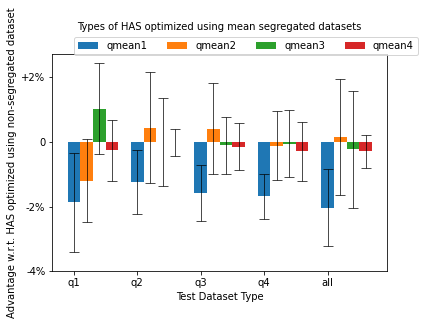

In [11]:
fig, ax = plt.subplots()
for idx, optim_type in enumerate(optim_type_list):
    avgs = [advantage_dict[test_set][optim_type]["avg"] for test_set in test_set_list]
    stds = [advantage_dict[test_set][optim_type]["std"] for test_set in test_set_list]
    x_roots = np.arange(len(test_set_list)) # 5 datasets
    width = 0.8
    barwidth = width/len(optim_type_list)
    x_offsets = idx * barwidth
    x_poss = x_roots + x_offsets
    ax.bar(x_poss,
              avgs,
               width=barwidth,
               yerr=stds,
               label=optim_type,
               # color=color_dict[error_layer][val_type],
              error_kw=dict(ecolor='black', lw=1, capsize=5, capthick=1, alpha=0.7))
ax.legend(ncol=4,loc = "upper left",bbox_to_anchor=(0.05, 1.1, 0, 0.))
ax.set_xticks(np.arange(len(test_set_list)), test_set_list)
ax.set_xlabel("Test Dataset Type")
ax.set_ylabel("Advantage w.r.t. HAS optimized using non-segregated dataset")
text = "Types of HAS optimized using mean segregated datasets"
ax.text(0.5, 1.125, 
       text, 
       horizontalalignment='center', 
       verticalalignment='center', 
       transform=ax.transAxes)
ax.set_yticks([-0.04, -0.02, 0.0, 0.02],["-4%","-2%","0","+2%"])